In [2]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [4]:
(X_train , y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [5]:
X_train.shape

(60000, 28, 28)

In [7]:
X_test.shape

(10000, 28, 28)

In [9]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

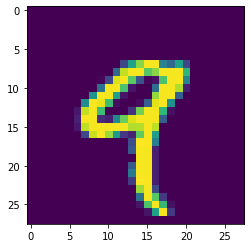

In [13]:
import matplotlib.pyplot as plt
plt.imshow(X_train[4])

In [14]:
X_train = X_train/255
X_test = X_test/255

In [17]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [18]:
X_test[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [46]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation = 'relu'))
model.add(Dense(32,activation = 'relu'))
model.add(Dense(10,activation = 'softmax'))

In [47]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 128)               100480    
                                                                 
 dense_6 (Dense)             (None, 32)                4128      
                                                                 
 dense_7 (Dense)             (None, 10)                330       
                                                                 
Total params: 104938 (409.91 KB)
Trainable params: 104938 (409.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [49]:
from tensorflow.keras.optimizers import Adam
optimizer = Adam()
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [51]:
history = model.fit(X_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25

1500/1500 [==============================] - 5s 3ms/step - loss: 0.2919 - accuracy: 0.9162 - val_loss: 0.1422 - val_accuracy: 0.9588
Epoch 2/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1259 - accuracy: 0.9629 - val_loss: 0.1119 - val_accuracy: 0.9643
Epoch 3/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0877 - accuracy: 0.9735 - val_loss: 0.1045 - val_accuracy: 0.9680
Epoch 4/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0659 - accuracy: 0.9798 - val_loss: 0.1021 - val_accuracy: 0.9691
Epoch 5/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0494 - accuracy: 0.9841 - val_loss: 0.0965 - val_accuracy: 0.9724
Epoch 6/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0404 - accuracy: 0.9866 - val_loss: 0.1063 - val_accuracy: 0.9697
Epoch 7/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0321 - accuracy: 0.9894 - val_loss: 0.1043 - val_accuracy

In [56]:
Y_prob = model.predict(X_test)

313/313 [==============================] - 0s 1ms/step


In [57]:
Y_pred = Y_prob.argmax(axis = 1)

In [58]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,Y_pred)

0.9742

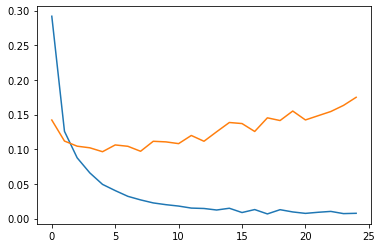

In [59]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

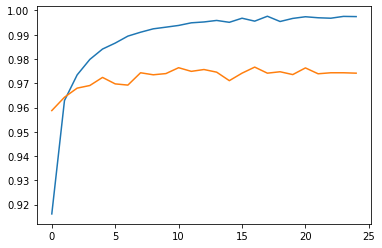

In [60]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [62]:
model.predict(X_test[0].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 34ms/step


array([7], dtype=int64)